
# Project: Investigate a Dataset : `The Movie Database (TMDb)`

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#summary">Assesment Conclusion</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> **Overview:** The Dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings, cast, genres, budgets, revenues. 

>> We're going to try to explore those data to reach out and conduct some insights. For instance, The movies associated with making the highest revenue and and other factors that reflects the popularity of the movies.
the factories that reflects the movie popularity and revenue like the genere, release date (Weekday, Month) during which time of the year ,directors and production company.
Elso stating the relationship between popularity meaures (votes) and the revenue itself.


### Questions:
> #### 1. Which Week day & month is more promising in terms of releasing movies and generating high revenue ?
> #### 2. What kinds of properties are associated with movies that have high revenues ?
> #### 3. The frequency of movies released across Years.
> #### 4. Top 20 Movies in term of the revenue & budget and the generated income.
> #### 5. Timeline frequency of movies released across Years.
> #### 6. What genres are most frequent from year to year ?
> #### 7. To what extent we can relate the vote of each movie to it's popularity ?

In [1]:
#Importing libraries needed 
import pandas as pd 
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import time
from timeit import default_timer as timer

<a id='wrangling'></a>
## Data Wrangling
### General Properties - Assesment 

In [2]:
# IMBD Movies dataframe
tmdb= pd.read_csv('tmdb-movies.csv')

In [3]:
tmdb

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


### - Some Movies have 0 budget & Revenue value 

### - We have release date and release year , year in release date could be disgarded to conduct more relvant and specific anlaysis

### - Romove "tt" from `imdb_id` and covert it to int or category

#### Persosnal Note :

` Popularity based on the following Criteria:
 Number of votes for the day
 Number of views for the day
 Number of users who marked it as a "favourite" for the day
 Number of users who added it to their "watchlist" for the day
 Release date
 Number of total votes
 Previous days score
 for more details check.`

https://developers.themoviedb.org/3/getting-started/popularity

In [4]:
tmdb.shape

(10866, 21)

In [5]:
tmdb.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
#further invistage to check whether object is str
type(tmdb["imdb_id"][0])

str

In [7]:
type(tmdb["id"][0])

numpy.int64

### tmdb column data-type is numpy.int64 

In [8]:
type(tmdb["original_title"][0])

str

In [9]:
type(tmdb["cast"][0])

str

In [10]:
type(tmdb["director"][0])

str

In [11]:
type(tmdb["genres"][0])

str

In [12]:
type(tmdb["release_date"][0]) 

str

In [13]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### - id and Imdb_id columns should be unique Identifiers.
### - genre column should be converted to categorical data.
### -  release_date colmun to be converted to date type.

In [14]:
tmdb.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [15]:
tmdb.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### - Dealing with None values.

In [16]:
tmdb.duplicated().sum()

1

In [17]:
sum(tmdb.duplicated())

1

### - Remove the duplicate row in the DataFrame.

In [18]:
tmdb['genres'].unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Adventure|Drama|Action|Family|Foreign',
       'Comedy|Family|Mystery|Romance',
       'Mystery|Science Fiction|Thriller|Drama'], dtype=object)

### Replacing "|" with "," or trying to covert it to str

In [19]:
tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### 50% of the values in revenue and budget = 0 

In [20]:
tmdb['genres'].value_counts()

Drama                         712
Comedy                        712
Documentary                   312
Drama|Romance                 289
Comedy|Drama                  280
                             ... 
Adventure|Drama|War             1
Romance|Horror|Thriller         1
Crime|Fantasy|Drama             1
Action|Adventure|Horror         1
Thriller|Adventure|Fantasy      1
Name: genres, Length: 2039, dtype: int64

In [21]:
tmdb['cast'].value_counts()

Louis C.K.                                                                        6
William Shatner|Leonard Nimoy|DeForest Kelley|James Doohan|George Takei           5
Bill Burr                                                                         4
Chris Wedge                                                                       3
Pierre Coffin                                                                     3
                                                                                 ..
Gael GarcÃ­a Bernal|Shohreh Aghdashloo|Jason Jones|Haluk Bilginer|Nasser Faris    1
Anna Kendrick|Skylar Astin|Brittany Snow|Anna Camp|Rebel Wilson                   1
Johnny Depp|Winona Ryder|Dianne Wiest|Alan Arkin|Anthony Michael Hall             1
Jackie Gleason|Jerry Reed|Paul Williams|Pat McCormick|Colleen Camp                1
Brad Pitt|Mireille Enos|Abigail Hargrove|Sterling Jerins|James Badge Dale         1
Name: cast, Length: 10719, dtype: int64

### Data in genre and cast column contain multiple values within the same cell

In [22]:
tmdb['genres'].value_counts().sum()

10843

In [23]:
tmdb['popularity'].value_counts()

0.109305    2
0.114027    2
0.126182    2
0.247926    2
0.410235    2
           ..
0.645437    1
0.088796    1
0.155075    1
0.596755    1
0.234375    1
Name: popularity, Length: 10814, dtype: int64

In [24]:
tmdb['budget'].value_counts()

0           5696
20000000     190
15000000     183
25000000     178
10000000     176
            ... 
51500000       1
25500000       1
1350000        1
7920000        1
4653000        1
Name: budget, Length: 557, dtype: int64

In [25]:
tmdb['revenue'].value_counts()

0            6016
12000000       10
10000000        8
11000000        7
6000000         6
             ... 
53676580        1
617000          1
13001257        1
504050219       1
20518905        1
Name: revenue, Length: 4702, dtype: int64

In [26]:
tmdb['runtime'].value_counts()

90     547
95     358
100    335
93     328
97     306
      ... 
235      1
20       1
220      1
236      1
219      1
Name: runtime, Length: 247, dtype: int64

In [27]:
tmdb['production_companies'].value_counts()

Paramount Pictures                                                                                      156
Universal Pictures                                                                                      133
Warner Bros.                                                                                             84
Walt Disney Pictures                                                                                     76
Columbia Pictures                                                                                        72
                                                                                                       ... 
Paramount Pictures|Di Bonaventura Pictures|Mace Neufeld Productions|Skydance Productions|Etalon film      1
Team Todd|Blumhouse Productions|Yari Film Group (YFG)                                                     1
Columbia Pictures Corporation|Yellowbird Productions                                                      1
Agora Entertainment         

In [28]:
tmdb['release_date'].value_counts()

1/1/09      28
1/1/08      21
1/1/07      18
1/1/05      16
10/10/14    15
            ..
9/15/00      1
8/16/90      1
4/12/72      1
11/12/08     1
9/22/08      1
Name: release_date, Length: 5909, dtype: int64

In [29]:
tmdb['vote_count'].value_counts()

10      501
11      474
12      422
13      377
14      323
       ... 
652       1
628       1
612       1
2645      1
2027      1
Name: vote_count, Length: 1289, dtype: int64

In [30]:
tmdb['vote_average'].value_counts()

6.1    496
6.0    495
5.8    486
5.9    473
6.2    464
      ... 
8.9      1
8.6      1
9.2      1
8.7      1
2.0      1
Name: vote_average, Length: 72, dtype: int64

In [31]:
tmdb['release_year'].value_counts()

2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    490
2007    438
2006    408
2005    364
2004    307
2003    281
2002    266
2001    242
2000    227
1999    224
1998    210
1996    204
1997    192
1994    184
1993    178
1995    175
1988    145
1989    137
1992    133
1991    133
1990    132
1987    125
1986    121
1985    109
1984    105
1981     82
1982     81
1983     80
1980     78
1978     65
1979     57
1977     57
1971     55
1973     55
1974     47
1976     47
1966     46
1975     44
1964     42
1970     41
1967     40
1972     40
1968     39
1965     35
1963     34
1962     32
1960     32
1969     31
1961     31
Name: release_year, dtype: int64

In [32]:
tmdb['budget_adj'].value_counts()

0.000000e+00    5696
1.016400e+07      17
2.103337e+07      17
2.000000e+07      16
4.605455e+06      15
                ... 
4.658819e+06       1
6.641668e+07       1
2.289547e+07       1
2.206182e+06       1
2.264205e+06       1
Name: budget_adj, Length: 2614, dtype: int64

In [33]:
tmdb['revenue_adj'].value_counts()

0.000000e+00    6016
1.438914e+07       2
5.766759e+07       2
1.000000e+06       2
2.093547e+08       2
                ... 
7.036068e+07       1
2.714497e+07       1
7.694895e+07       1
1.087002e+06       1
1.062776e+09       1
Name: revenue_adj, Length: 4840, dtype: int64

In [34]:
tmdb.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [35]:
tmdb.duplicated().sum()

1

In [36]:
tmdb['id'].duplicated().sum()

1

In [37]:
tmdb['imdb_id'].duplicated().sum()

10

In [38]:
tmdb['original_title'].duplicated().sum()

295

<a id='summary'></a>
# Visual and Programatic Assesment Conclusions [Summary]
 
 ## `Quality issues`
 
  
 `1. id and Imdb_id columns should be unique Identifiers ` + `tmdb column data-type is numpy.int64 `
 
  Converting `id` from `int` to string  +  `Imdb_id` from` numpy.int64` to str

 `2.` `genre` `column should be converted to ` `categorical data`

`3. the year in "release_date" Columns should be converted to datetype and dropped later.`
 
  -Convert `release_date` to `datetime`, extract the `month_name` and `week_day` from `release date` then droping the `release date` column.
  
 -Caused alot of confusion while i was trying to handle it so i decided this is the best way to handle it without complicating my code.
 
 `4.Duplicate rows in the TMBD dateframe`
 
   -Remove the duplicate row in the DataFrame. 
  
 `5.Some Movies have 0 budget & Revenue value `
 
  -Replace it with NaN value then dropping them before conducting our analysis.

 `6-Dropping "budget","revenue" and keep the present value version of it to be used in our analysis`
  
 `7. Misssing values (Null Values) in homepage, director, tagline, keywords, overview, genres columns`
 
  -Drop the the columns that we don't need from our conducted conclusions prospective, like `Homepage`,`Overview`,`Keywords`,`tageline` columns
  
  -Dealing with None values
  
 `8.droping ``Imdb_id` column.

  
  
  ## `Tidness issues`
   
  `1- Some Column names are non-descriptive like budget_adj and revenue_adj to budget_pv,revenue_pv` `pv`  `mean present value` +  `release_year` column to `year`
  
  -Changing thier coresponding names 

  `2- data in genre and cast column contain multiple values within the same cell `
  
  -For the ultimate goal of not compicating or dateset we will create 2 variables for each one by seperatly spliting them and try to conduct more useful analysis out of it.
 

# Data Cleaning

In [39]:
# making a copy of our data 
tmdb_clean = tmdb.copy()

### `Quality issues`

 ### `1. id and Imdb_id columns should be unique Identifiers ` + `tmdb column data-type is numpy.int64 `
##### Define
Converting `id` from int to string `astype`

#### Code

In [40]:
tmdb_clean.imdb_id = tmdb_clean.imdb_id.astype(str)
tmdb_clean["id"] = tmdb_clean["id"].astype(str)

#### Test

In [41]:
type(tmdb_clean["imdb_id"][0]),type(tmdb_clean["id"][0])

(str, str)

### `2.` `genre` `column should be converted to ` `categorical data`

#### Define
`genre` column should be converted to `categorical data`

#### Code

In [42]:
# converting genres column to category data-type
tmdb_clean.genres = tmdb_clean.genres.astype('category')

#### Test

In [43]:
tmdb_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    10866 non-null  object  
 1   imdb_id               10866 non-null  object  
 2   popularity            10866 non-null  float64 
 3   budget                10866 non-null  int64   
 4   revenue               10866 non-null  int64   
 5   original_title        10866 non-null  object  
 6   cast                  10790 non-null  object  
 7   homepage              2936 non-null   object  
 8   director              10822 non-null  object  
 9   tagline               8042 non-null   object  
 10  keywords              9373 non-null   object  
 11  overview              10862 non-null  object  
 12  runtime               10866 non-null  int64   
 13  genres                10843 non-null  category
 14  production_companies  9836 non-null   object  
 15  re

### `3. the year in "release_date" Columns should be converted to datetype and dropped later.`

#### Define
Convert `release_date` and Extract the `month_name` and `week_day` from `release date` .

Droping the `release date` column.

#### Code

In [44]:
#Convert `release_date` and `release year` columns to date-type.
tmdb_clean['release_date']= pd.to_datetime(tmdb_clean['release_date'])
# extract the month from release date
tmdb_clean['month'] = tmdb_clean.release_date.apply(lambda x: x.month_name())
#extarct the week_day from release data
tmdb_clean['week_day'] = tmdb_clean.release_date.apply(lambda x: x.day_name())
#dropping release_date column
tmdb_clean = tmdb_clean.drop(columns=['release_date'])

In [45]:
tmdb_clean.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,month,week_day
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,June,Tuesday
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,May,Wednesday
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,March,Wednesday
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09,December,Tuesday
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09,April,Wednesday


In [46]:
tmdb_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    10866 non-null  object  
 1   imdb_id               10866 non-null  object  
 2   popularity            10866 non-null  float64 
 3   budget                10866 non-null  int64   
 4   revenue               10866 non-null  int64   
 5   original_title        10866 non-null  object  
 6   cast                  10790 non-null  object  
 7   homepage              2936 non-null   object  
 8   director              10822 non-null  object  
 9   tagline               8042 non-null   object  
 10  keywords              9373 non-null   object  
 11  overview              10862 non-null  object  
 12  runtime               10866 non-null  int64   
 13  genres                10843 non-null  category
 14  production_companies  9836 non-null   object  
 15  vo

 We will drop `imdb_id` column cause it's better to use `id`  instead of `imdb_id` to avoid confusions

###   `4.Duplicate rows in the TMBD dateframe`


#### Define
Remove duplicate rows in the TMBD dateframe usng `drop_duplicates()`

#### Code

In [47]:
#removing duplicates
tmdb_clean.drop_duplicates(inplace = True)

#### Test

In [48]:
sum(tmdb_clean.duplicated())

0

 ###  `5.Some Movies have 0 budget & Revenue value `

#### Define
Replace Movies have `0` value in `budget`, `revenue`, `budget_adj` and `revenue_adj` column with `NaN` value 

#### Code

In [49]:
#replace "0" value with np.nan
tmdb_clean['budget'] = tmdb_clean['budget'].replace(0, np.nan)
tmdb_clean['revenue'] = tmdb_clean['revenue'].replace(0, np.nan)
tmdb_clean['revenue_adj'] = tmdb_clean['revenue_adj'].replace(0, np.nan)
tmdb_clean['budget_adj'] = tmdb_clean['budget_adj'].replace(0, np.nan)

#### Test

In [50]:
tmdb_clean['budget'].value_counts(dropna = False) 

NaN            5696
20000000.0      190
15000000.0      183
25000000.0      178
10000000.0      176
               ... 
11.0              1
348164.0          1
1065000.0         1
237000000.0       1
9400000.0         1
Name: budget, Length: 557, dtype: int64

In [51]:
tmdb_clean['budget_adj'].value_counts(dropna = False) 

NaN             5696
1.016400e+07      17
2.103337e+07      17
2.000000e+07      16
4.605455e+06      15
                ... 
4.658819e+06       1
6.641668e+07       1
2.289547e+07       1
2.206182e+06       1
2.264205e+06       1
Name: budget_adj, Length: 2614, dtype: int64

### `6-Dropping "budget","revenue" and keep the present value version of it to be used in our analysis`

#### Define
Dropping `"budget"`,`"revenue"` column and keep the `present value version` 

#### Code

In [52]:
tmdb_clean = tmdb_clean.drop(columns=['budget',
                                      'revenue',])

#### Test

In [53]:
tmdb_clean.head()

,id,imdb_id,popularity,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,month,week_day
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,June,Tuesday
1,76341,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,May,Wednesday
2,262500,tt2908446,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,March,Wednesday
3,140607,tt2488496,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09,December,Tuesday
4,168259,tt2820852,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09,April,Wednesday


 ### `7. Misssing values (Null Values) in homepage, director, tagline, keywords, overview, genres columns`
    
 ### `8.droping ``Imdb_id` column.
   
#### Define
Misssing values`Null Values` in `homepage`,`cast`, `director`, `tagline`, `keywords`, `overview`, `genres`, `production_compaies` columns

Drop `imdb_id` column

`Making another copy of the dateframe before dropping NaN.`

#### Code

In [54]:
#removing unrelevant column for our analysis by dropping (`homepage`, `tagline`, `keywords` and `overview` columns)
tmdb_clean = tmdb_clean.drop(columns=['imdb_id',
                                      'homepage',
                                    'tagline', 
                                    'keywords', 
                                    'overview'])
# making new copy of the dataframe before droping missing values
tmdb_clean2 = tmdb_clean.copy()
# using .dropna(subset=) to remove the missing values in the other needed columns
tmdb_clean2.dropna(subset = ['director','genres','production_companies',"cast"], inplace = True)

#### Test

In [55]:
tmdb_clean.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,month,week_day
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,June,Tuesday
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,May,Wednesday
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,March,Wednesday
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09,December,Tuesday
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09,April,Wednesday


In [56]:
tmdb_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    9772 non-null   object  
 1   popularity            9772 non-null   float64 
 2   original_title        9772 non-null   object  
 3   cast                  9772 non-null   object  
 4   director              9772 non-null   object  
 5   runtime               9772 non-null   int64   
 6   genres                9772 non-null   category
 7   production_companies  9772 non-null   object  
 8   vote_count            9772 non-null   int64   
 9   vote_average          9772 non-null   float64 
 10  release_year          9772 non-null   int64   
 11  budget_adj            5021 non-null   float64 
 12  revenue_adj           4750 non-null   float64 
 13  month                 9772 non-null   object  
 14  week_day              9772 non-null   object  
dtypes: 

## `Tidiness issues`

### `1- Some Column names are non-descriptive like budget_adj and revenue_adj to budget_pv,revenue_pv pv mean present value + release_year column to year`
#### Define
Renaming Columns in the dataFrame

#### Code

In [57]:
#Renaming Columns
tmdb_clean.rename(columns = {'budget_adj':'budget_pv'},inplace = True)
tmdb_clean.rename(columns = {'revenue_adj':'revenue_pv'},inplace = True)
tmdb_clean.rename(columns = {'release_year':'year'},inplace = True)
#Renaming Columns in the tmbd_clean2 as well
tmdb_clean2.rename(columns = {'budget_adj':'budget_pv'},inplace = True)
tmdb_clean2.rename(columns = {'revenue_adj':'revenue_pv'},inplace = True)
tmdb_clean2.rename(columns = {'release_year':'year'},inplace = True)

#### Test

In [58]:
tmdb_clean.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,year,budget_pv,revenue_pv,month,week_day
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,June,Tuesday
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,May,Wednesday
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,March,Wednesday
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09,December,Tuesday
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09,April,Wednesday


### `2- data in genre and cast column contain multiple values within the same cell `
#### Define
-For the ultimate goal of not compicating or dateset we will create 2 variables for each one by seperatly spliting them and try to conduct more useful analysis out of it.

### We did it in the exploration part (Research Question 5)

<a id='eda'></a>
## Exploratory Data Analysis

`adding "Net_income" column for our future analysis`

In [59]:
tmdb_clean["net_income"] = tmdb_clean["revenue_pv"] - tmdb_clean["budget_pv"]
tmdb_clean2["net_income"] = tmdb_clean["revenue_pv"] - tmdb_clean["budget_pv"]

In [60]:
tmdb_clean["net_income"]

0        1.254446e+09
1        2.101614e+08
2        1.704191e+08
3        1.718723e+09
4        1.210949e+09
             ...     
10861             NaN
10862             NaN
10863             NaN
10864             NaN
10865             NaN
Name: net_income, Length: 10865, dtype: float64

In [61]:
# indicating the movies with the highest 20 revenue across the data
highest_revenue = tmdb_clean.nlargest(20, 'revenue_pv')[['original_title', 'revenue_pv','net_income', 'genres', 'director','production_companies', 'month', 'week_day']]
# indicating the movies with the highest 20 budget across the data
highest_budget = tmdb_clean.nlargest(20, 'budget_pv')[['original_title', 'budget_pv','revenue_pv','net_income', 'genres', 'director','production_companies', 'month', 'week_day']]

In [62]:
highest_revenue.groupby(['original_title', 'month']).revenue_pv.mean().sort_values()

original_title                                 month   
Return of the Jedi                             May         1.253819e+09
The Godfather                                  March       1.277914e+09
Harry Potter and the Deathly Hallows: Part 2   July        1.287184e+09
Avengers: Age of Ultron                        April       1.292632e+09
The Lord of the Rings: The Return of the King  December    1.326278e+09
The Jungle Book                                October     1.345551e+09
Furious 7                                      April       1.385749e+09
Jurassic Park                                  June        1.388863e+09
Jurassic World                                 June        1.392446e+09
The Empire Strikes Back                        January     1.424626e+09
The Avengers                                   April       1.443191e+09
One Hundred and One Dalmatians                 January     1.574815e+09
The Net                                        July        1.583050e+09
E.T. the

In [63]:
highest_revenue

,original_title,revenue_pv,net_income,genres,director,production_companies,month,week_day
1386,Avatar,2.827124e+09,2.586237e+09,Action|Adventure|Fantasy|Science Fiction,James Cameron,Ingenious Film Partners|Twentieth Century Fox ...,December,Thursday
1329,Star Wars,2.789712e+09,2.750137e+09,Adventure|Action|Science Fiction,George Lucas,Lucasfilm|Twentieth Century Fox Film Corporation,March,Sunday
5231,Titanic,2.506406e+09,2.234714e+09,Drama|Romance|Thriller,James Cameron,Paramount Pictures|Twentieth Century Fox Film ...,November,Tuesday
10594,The Exorcist,2.167325e+09,2.128036e+09,Drama|Horror|Thriller,William Friedkin,Warner Bros.|Hoya Productions,December,Wednesday
9806,Jaws,1.907006e+09,1.878643e+09,Horror|Thriller|Adventure,Steven Spielberg,Universal Pictures|Zanuck/Brown Productions,June,Wednesday
3,Star Wars: The Force Awakens,1.902723e+09,1.718723e+09,Action|Adventure|Science Fiction|Fantasy,J.J. Abrams,Lucasfilm|Truenorth Productions|Bad Robot,December,Tuesday
8889,E.T. the Extra-Terrestrial,1.791694e+09,1.767968e+09,Science Fiction|Adventure|Family|Fantasy,Steven Spielberg,Universal Pictures|Amblin Entertainment,April,Saturday
8094,The Net,1.583050e+09,1.551568e+09,Crime|Drama|Mystery|Thriller|Action,Irwin Winkler,Columbia Pictures,July,Friday
10110,One Hundred and One Dalmatians,1.574815e+09,1.545635e+09,Adventure|Animation|Comedy|Family,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,Walt Disney Productions,January,Tuesday
4361,The Avengers,1.443191e+09,1.234248e+09,Science Fiction|Action|Adventure,Joss Whedon,Marvel Studios,April,Wednesday


### Research Question 1 : Which Week day & month is more promising in term if releasing movies and generating high revenue ? 

Text(0, 0.5, 'Revenue')

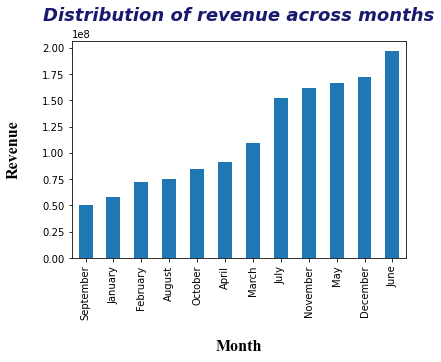

In [64]:
#ploting
tmdb_clean.groupby(['month']).revenue_pv.mean().sort_values().plot(kind = 'bar')
plt.title("Distribution of revenue across months",fontsize = 18 ,pad=20 ,color='MidnightBlue',fontstyle= 'oblique',fontweight ='extra bold' ,fontfamily='sans-serif',fontvariant='small-caps')
plt.xlabel('Month',fontsize = 16,fontweight ='bold',labelpad=20,fontfamily= 'times new roman')
plt.ylabel('Revenue',fontsize = 16,fontweight ='bold',labelpad=20,fontfamily= 'times new roman')

Text(0, 0.5, 'Revenue')

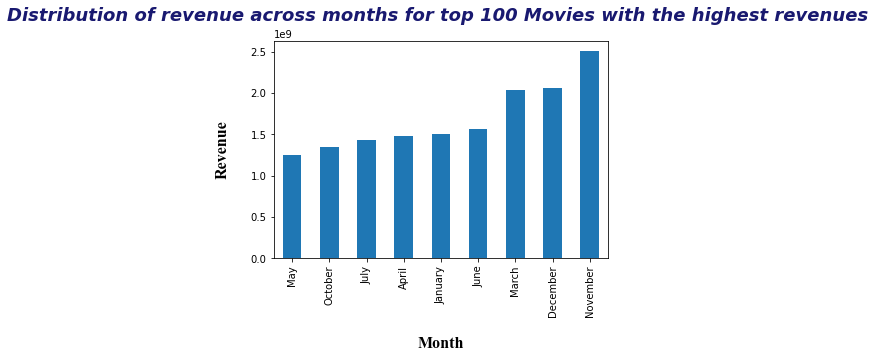

In [65]:
#ploting
highest_revenue.groupby(['month']).revenue_pv.mean().sort_values().plot(kind = 'bar')
plt.title("Distribution of revenue across months for top 100 Movies with the highest revenues ",fontsize = 18 ,pad=20 ,color='MidnightBlue',fontstyle= 'oblique',fontweight ='extra bold' ,fontfamily='sans-serif',fontvariant='small-caps')
plt.xlabel('Month',fontsize = 16,fontweight ='bold',labelpad=20,fontfamily= 'times new roman')
plt.ylabel('Revenue',fontsize = 16,fontweight ='bold',labelpad=20,fontfamily= 'times new roman')

>### From the previous 2 figures, We can see Figure (1) : The month that generated the largest portoion of revenue across all the movies is December and Figure(2) : after filterig the date to only showing the highest revenue for the top 100 movies shifts to Junuary but very close to December revenues
>>### It could be because the chrasmase time in December and Junuary, Movies are mostly likely to be released and seen by many.


Text(0, 0.5, 'Revenue')

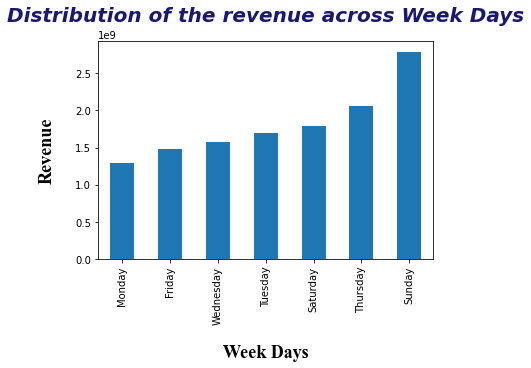

In [66]:
#ploting
highest_revenue.groupby(['week_day']).revenue_pv.mean().sort_values().plot(kind = 'bar')
plt.title("Distribution of the revenue across Week Days",fontsize = 20 ,pad=20 ,color='MidnightBlue',fontstyle= 'oblique',fontweight ='extra bold' ,fontfamily='sans-serif',fontvariant='small-caps')
plt.xlabel('Week Days',fontsize = 18,fontweight ='bold',labelpad=20,fontfamily= 'times new roman')
plt.ylabel('Revenue',fontsize = 18,fontweight ='bold',labelpad=20,fontfamily= 'times new roman')

>### As it's shown in the graph that Sunday & Saturday and thursday tend to be more likely to be a good choice to release movies.
>>### `The reason coud be that in weekend days there trying to enjoy it as it's consider a day off and spending good time with thier famillies , etc.`


### Research Question 2 : Top 20 Movies in term of the revenue & budget and the generated income .

Text(0, 0.5, 'Movie title')

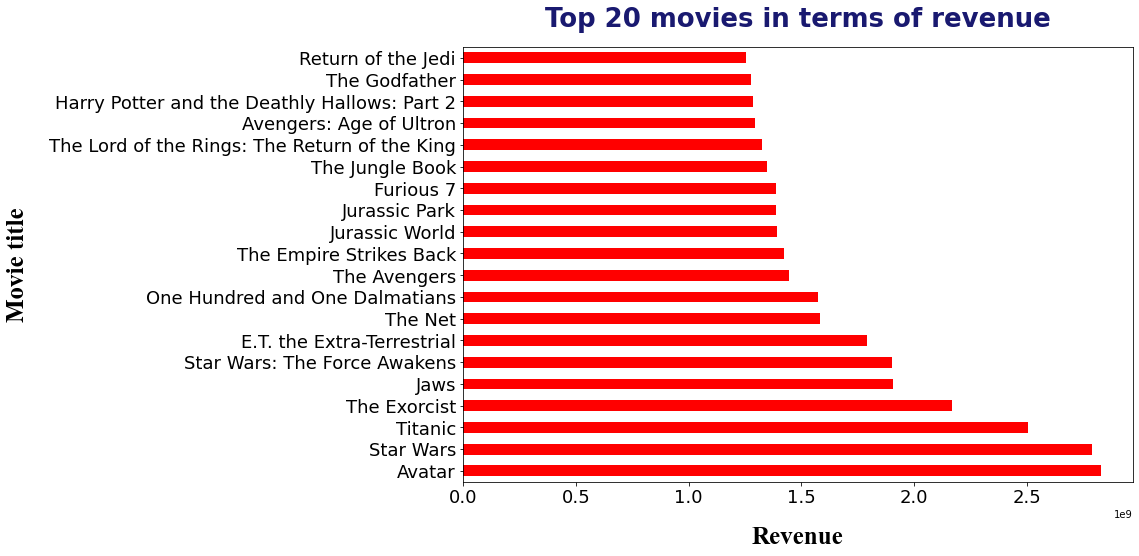

In [67]:
#linking revenue with thier corrsponding title  
movies_highest = highest_revenue.groupby(['original_title']).revenue_pv.mean().sort_values(ascending=False)
#ploting
movies_highest.plot(kind= 'barh', figsize=(12, 8) , fontsize= 18 , color='red')
plt.title('Top 20 movies in terms of revenue',fontsize = 26 ,pad=20,fontweight ='extra bold',color='MidnightBlue')
plt.xlabel('Revenue',fontsize = 25,fontweight ='bold',fontfamily= 'times new roman',labelpad=20)
plt.ylabel('Movie title',fontsize = 25,fontweight ='bold',fontfamily= 'times new roman',labelpad=20)

In [68]:
# the highest 20 income in the date with thier corrsponding relevant properties.
highest_income = tmdb_clean2.nlargest(20, 'net_income')[['original_title', 'revenue_pv','net_income', 'genres', 'director','production_companies', 'month', 'week_day']]

In [69]:
pd.DataFrame(highest_income)

,original_title,revenue_pv,net_income,genres,director,production_companies,month,week_day
1329,Star Wars,2.789712e+09,2.750137e+09,Adventure|Action|Science Fiction,George Lucas,Lucasfilm|Twentieth Century Fox Film Corporation,March,Sunday
1386,Avatar,2.827124e+09,2.586237e+09,Action|Adventure|Fantasy|Science Fiction,James Cameron,Ingenious Film Partners|Twentieth Century Fox ...,December,Thursday
5231,Titanic,2.506406e+09,2.234714e+09,Drama|Romance|Thriller,James Cameron,Paramount Pictures|Twentieth Century Fox Film ...,November,Tuesday
10594,The Exorcist,2.167325e+09,2.128036e+09,Drama|Horror|Thriller,William Friedkin,Warner Bros.|Hoya Productions,December,Wednesday
9806,Jaws,1.907006e+09,1.878643e+09,Horror|Thriller|Adventure,Steven Spielberg,Universal Pictures|Zanuck/Brown Productions,June,Wednesday
8889,E.T. the Extra-Terrestrial,1.791694e+09,1.767968e+09,Science Fiction|Adventure|Family|Fantasy,Steven Spielberg,Universal Pictures|Amblin Entertainment,April,Saturday
3,Star Wars: The Force Awakens,1.902723e+09,1.718723e+09,Action|Adventure|Science Fiction|Fantasy,J.J. Abrams,Lucasfilm|Truenorth Productions|Bad Robot,December,Tuesday
8094,The Net,1.583050e+09,1.551568e+09,Crime|Drama|Mystery|Thriller|Action,Irwin Winkler,Columbia Pictures,July,Friday
10110,One Hundred and One Dalmatians,1.574815e+09,1.545635e+09,Adventure|Animation|Comedy|Family,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,Walt Disney Productions,January,Tuesday
7309,The Empire Strikes Back,1.424626e+09,1.376998e+09,Adventure|Action|Science Fiction,Irvin Kershner,Lucasfilm|Twentieth Century Fox Film Corporation,January,Tuesday


Text(0, 0.5, 'The Title of the Movie ')

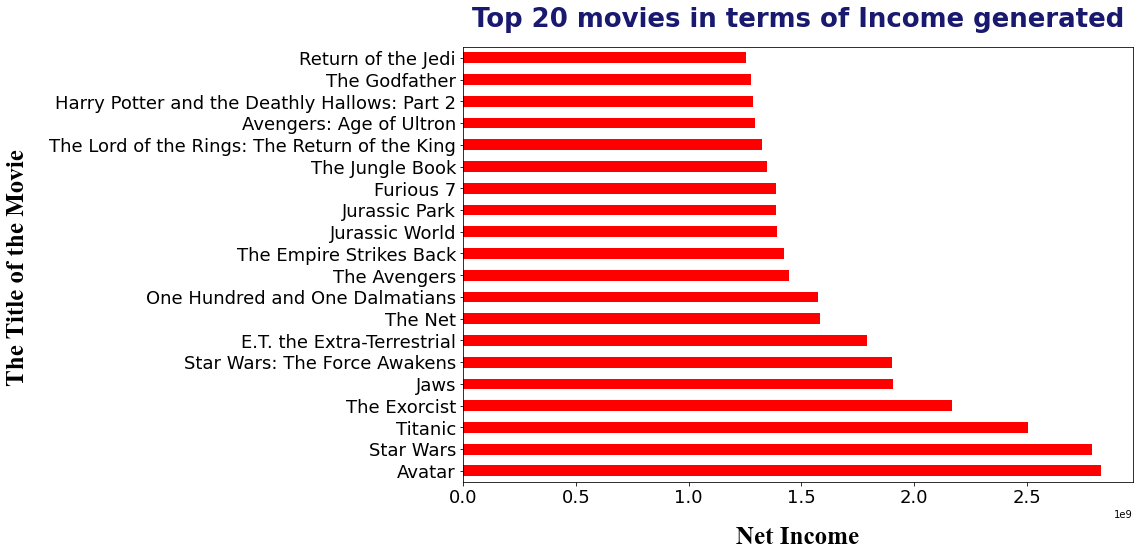

In [70]:
movies_income = highest_income.groupby(['original_title']).net_income.mean().sort_values(ascending=False)
#ploting
movies_highest.plot(kind= 'barh', figsize=(12, 8) , fontsize= 18 , color='red')
#set the title and labels
plt.title('Top 20 movies in terms of Income generated',fontsize = 26 ,pad=20,fontweight ='extra bold',color='MidnightBlue')
plt.xlabel('Net Income',fontsize = 25,fontweight ='bold',fontfamily= 'times new roman',labelpad=20)
plt.ylabel('The Title of the Movie ',fontsize = 25,fontweight ='bold',fontfamily= 'times new roman',labelpad=20)

>### As it's shown in the (2) figures that Avatar & Star Wars and Titanic generated the hiesgst net income & revenue.
>>### `Those are some Revelutionary movies in terms of genereating revenue & income.`

In [71]:
#linking budget with thier corrsponding title  
movies_highest_bu = highest_budget.groupby(['original_title']).budget_pv.mean().sort_values(ascending=False)
movies_highest_bu

original_title
The Warrior's Way                               4.250000e+08
Pirates of the Caribbean: On Stranger Tides     3.683713e+08
Pirates of the Caribbean: At World's End        3.155006e+08
Superman Returns                                2.920507e+08
Titanic                                         2.716921e+08
Spider-Man 3                                    2.713305e+08
Tangled                                         2.600000e+08
Avengers: Age of Ultron                         2.575999e+08
Harry Potter and the Half-Blood Prince          2.541001e+08
Waterworld                                      2.504192e+08
Harry Potter and the Deathly Hallows: Part 1    2.500000e+08
John Carter                                     2.469335e+08
Avatar                                          2.408869e+08
The Lone Ranger                                 2.386885e+08
The Dark Knight Rises                           2.374361e+08
The Hobbit: An Unexpected Journey               2.374361e+08
Terminato

In [72]:
#linking budget with thier corrsponding revenue  
movies_highest_re = highest_budget.groupby(['original_title']).revenue_pv.mean().sort_values(ascending=False)
movies_highest_re

original_title
Avatar                                          2.827124e+09
Titanic                                         2.506406e+09
Avengers: Age of Ultron                         1.292632e+09
The Dark Knight Rises                           1.026713e+09
Pirates of the Caribbean: At World's End        1.010654e+09
Pirates of the Caribbean: On Stranger Tides     9.904175e+08
The Hobbit: An Unexpected Journey               9.658933e+08
Harry Potter and the Deathly Hallows: Part 1    9.543059e+08
Harry Potter and the Half-Blood Prince          9.492765e+08
Spider-Man 3                                    9.369017e+08
Spider-Man 2                                    9.048154e+08
The Hobbit: The Desolation of Smaug             8.970944e+08
King Kong                                       6.141098e+08
Tangled                                         5.917949e+08
Terminator 3: Rise of the Machines              5.156284e+08
Superman Returns                                4.230205e+08
Waterworl

Text(0, 0.5, 'Movie title')

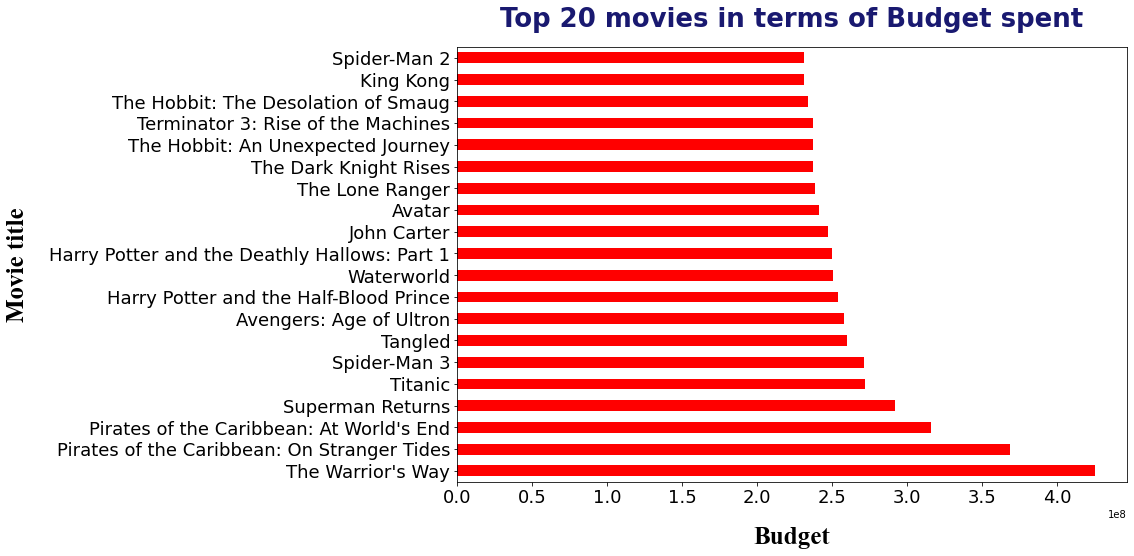

In [73]:
#ploting
movies_highest_bu.plot(kind= 'barh', figsize=(12, 8) , fontsize= 18 , color='red')
plt.title('Top 20 movies in terms of Budget spent',fontsize = 26 ,pad=20,fontweight ='extra bold',color='MidnightBlue')
plt.xlabel('Budget',fontsize = 25,fontweight ='bold',fontfamily= 'times new roman',labelpad=20)
plt.ylabel('Movie title',fontsize = 25,fontweight ='bold',fontfamily= 'times new roman',labelpad=20)

In [74]:
pd.DataFrame(tmdb_clean2['budget_pv'].describe())

,budget_pv
count,5.021000e+03
mean,3.778790e+07
std,4.220942e+07
min,9.210911e-01
25%,8.890145e+06
50%,2.374361e+07
75%,5.082002e+07
max,4.250000e+08


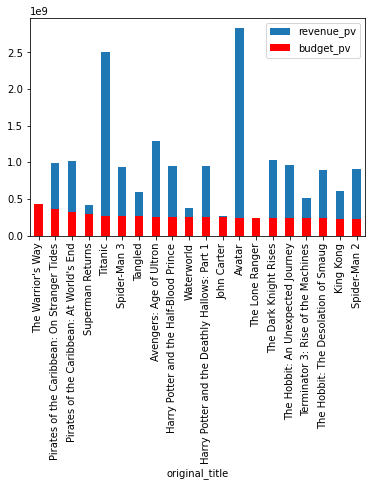

In [75]:
#ploting
ax = plt.gca()

highest_budget.plot(kind='bar',x='original_title',y='revenue_pv',ax=ax)
highest_budget.plot(kind='bar',x='original_title',y='budget_pv', color='red', ax=ax)
plt.xticks(rotation='vertical')

plt.show()

>### As it's shown in the first graph which represent the highest 10 budgeted movies and `The warrior's day` Comes with the highest budget
>>### `In the secound figure when we combined both revenue and budgets of movies, we can see that the `The warrior day` budget exceeded it's revenue causing a loss`

### Research Question 3 :  The frequency of movies released across Years 

In [76]:
# linking years with thier corrsponding movies released in it 
year_rel_fre = tmdb_clean.groupby('year').original_title.count()
year_rel_fre.head(),year_rel_fre.tail()

(year
 1960    32
 1961    31
 1962    32
 1963    34
 1964    42
 Name: original_title, dtype: int64,
 year
 2011    540
 2012    588
 2013    659
 2014    700
 2015    629
 Name: original_title, dtype: int64)

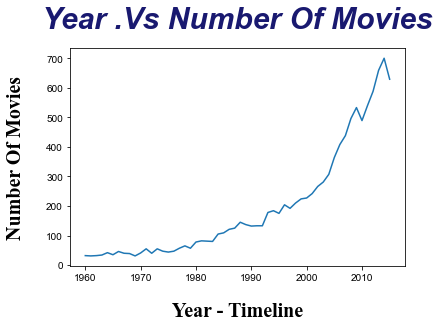

In [77]:
#ploting the date
year_rel_fre.plot(xticks = np.arange(1960,2015,10))

#set the title ,figure size and labels
sns.set(rc={'figure.figsize':(30,15)})
plt.title("Year .Vs Number Of Movies",fontsize = 30 ,pad=20 ,color='MidnightBlue',fontstyle= 'oblique',fontweight ='extra bold' ,fontfamily='sans-serif',fontvariant='small-caps')
plt.xlabel('Year - Timeline',labelpad =20,fontweight ='bold',fontfamily= 'times new roman',fontsize = 20)
plt.ylabel('Number Of Movies',labelpad =20,fontweight ='bold',fontfamily= 'times new roman',fontsize = 20)
#set the style sheet
sns.set_style("whitegrid")

>### The graph shows that the production of movies is increasing rapidly by time
>>#### `This could be due to nowdays technolgical and media revolution.`

### Research Question 4 :  what genres are most frequent from year to year ?

In [78]:
#spliting the values in the columns that have more than one genre into small Df
genre_year = tmdb_clean.set_index('year').genres.str.split('|', expand=True).stack()
genre_year

year   
2015  0             Action
      1          Adventure
      2    Science Fiction
      3           Thriller
      0             Action
                ...       
1966  0            Mystery
      1             Comedy
      0             Action
      1             Comedy
      0             Horror
Length: 26955, dtype: object

In [79]:
#creating columns for each genre type
genre_year_n = pd.get_dummies(genre_year, prefix='').groupby(level=0).sum()
#remove "_" from column names
genre_year_n.columns = genre_year_n.columns.str.replace('_', '')
genre_year_n.head(5)

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
year,,,,,,,,,,,,,,,,,,,,
1960,8.0,5.0,0.0,8.0,2.0,0.0,13.0,3.0,2.0,1.0,5.0,7.0,1.0,0.0,6.0,3.0,0.0,6.0,2.0,6.0
1961,7.0,6.0,1.0,10.0,2.0,0.0,16.0,5.0,2.0,1.0,3.0,3.0,2.0,1.0,7.0,4.0,0.0,0.0,2.0,3.0
1962,8.0,7.0,0.0,5.0,3.0,0.0,21.0,2.0,1.0,1.0,4.0,5.0,1.0,4.0,5.0,2.0,0.0,7.0,3.0,3.0
1963,4.0,7.0,1.0,13.0,4.0,0.0,13.0,3.0,2.0,2.0,4.0,9.0,0.0,6.0,8.0,2.0,0.0,10.0,1.0,2.0
1964,5.0,5.0,2.0,16.0,10.0,0.0,20.0,4.0,4.0,1.0,3.0,6.0,5.0,4.0,9.0,4.0,0.0,9.0,3.0,1.0


In [80]:
#sum of each genre
pd.DataFrame(genre_year_n.sum())

,0
Action,2384.0
Adventure,1471.0
Animation,699.0
Comedy,3793.0
Crime,1354.0
Documentary,520.0
Drama,4760.0
Family,1231.0
Fantasy,916.0
Foreign,188.0


Text(0.5, 0, 'Total Frequency Across all Years')

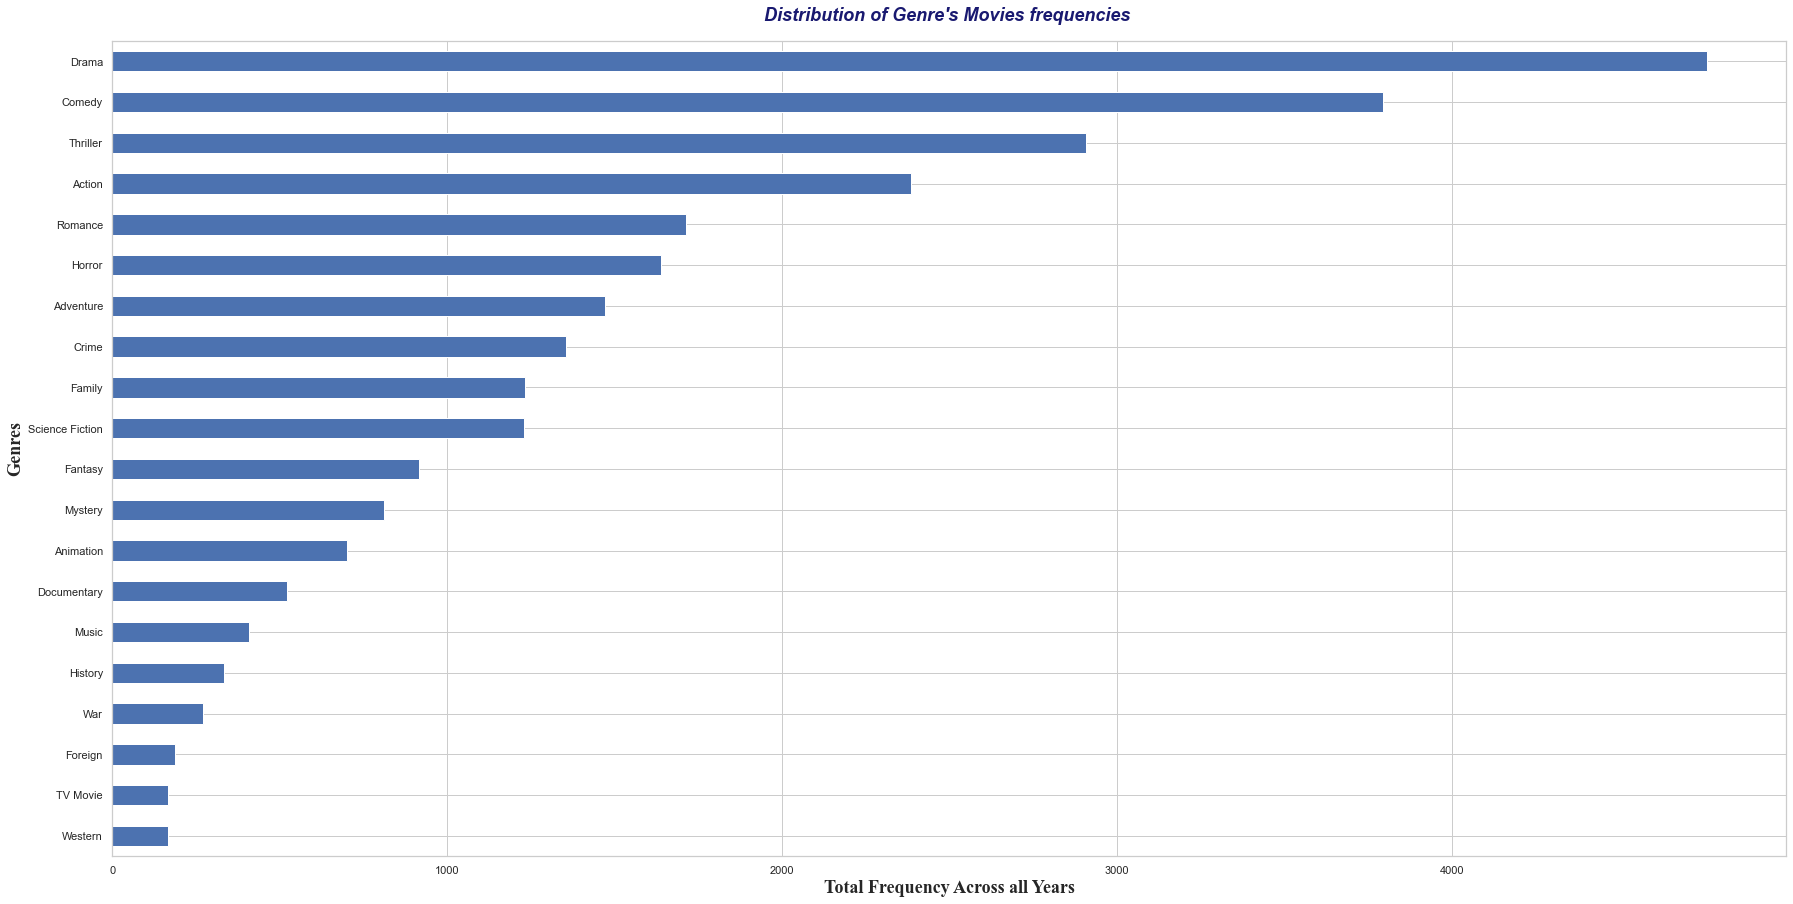

In [81]:
#plotting
genre_year_n.sum().sort_values().plot(kind ='barh')
#set the title and labels
plt.title("Distribution of Genre's Movies frequencies ",fontsize = 18 ,pad=20 ,color='MidnightBlue',fontstyle= 'oblique',fontweight ='extra bold' ,fontfamily='sans-serif',fontvariant='small-caps')
plt.ylabel('Genres',fontsize = 18,fontweight ='bold',fontfamily= 'times new roman')
plt.xlabel("Total Frequency Across all Years",fontsize = 18,fontweight ='bold',fontfamily= 'times new roman')

>### `As we can see in this graph which represent the total frequency of each genre in our data that Drama has the highest frequency then Comedy,thriller and Action,ETC`


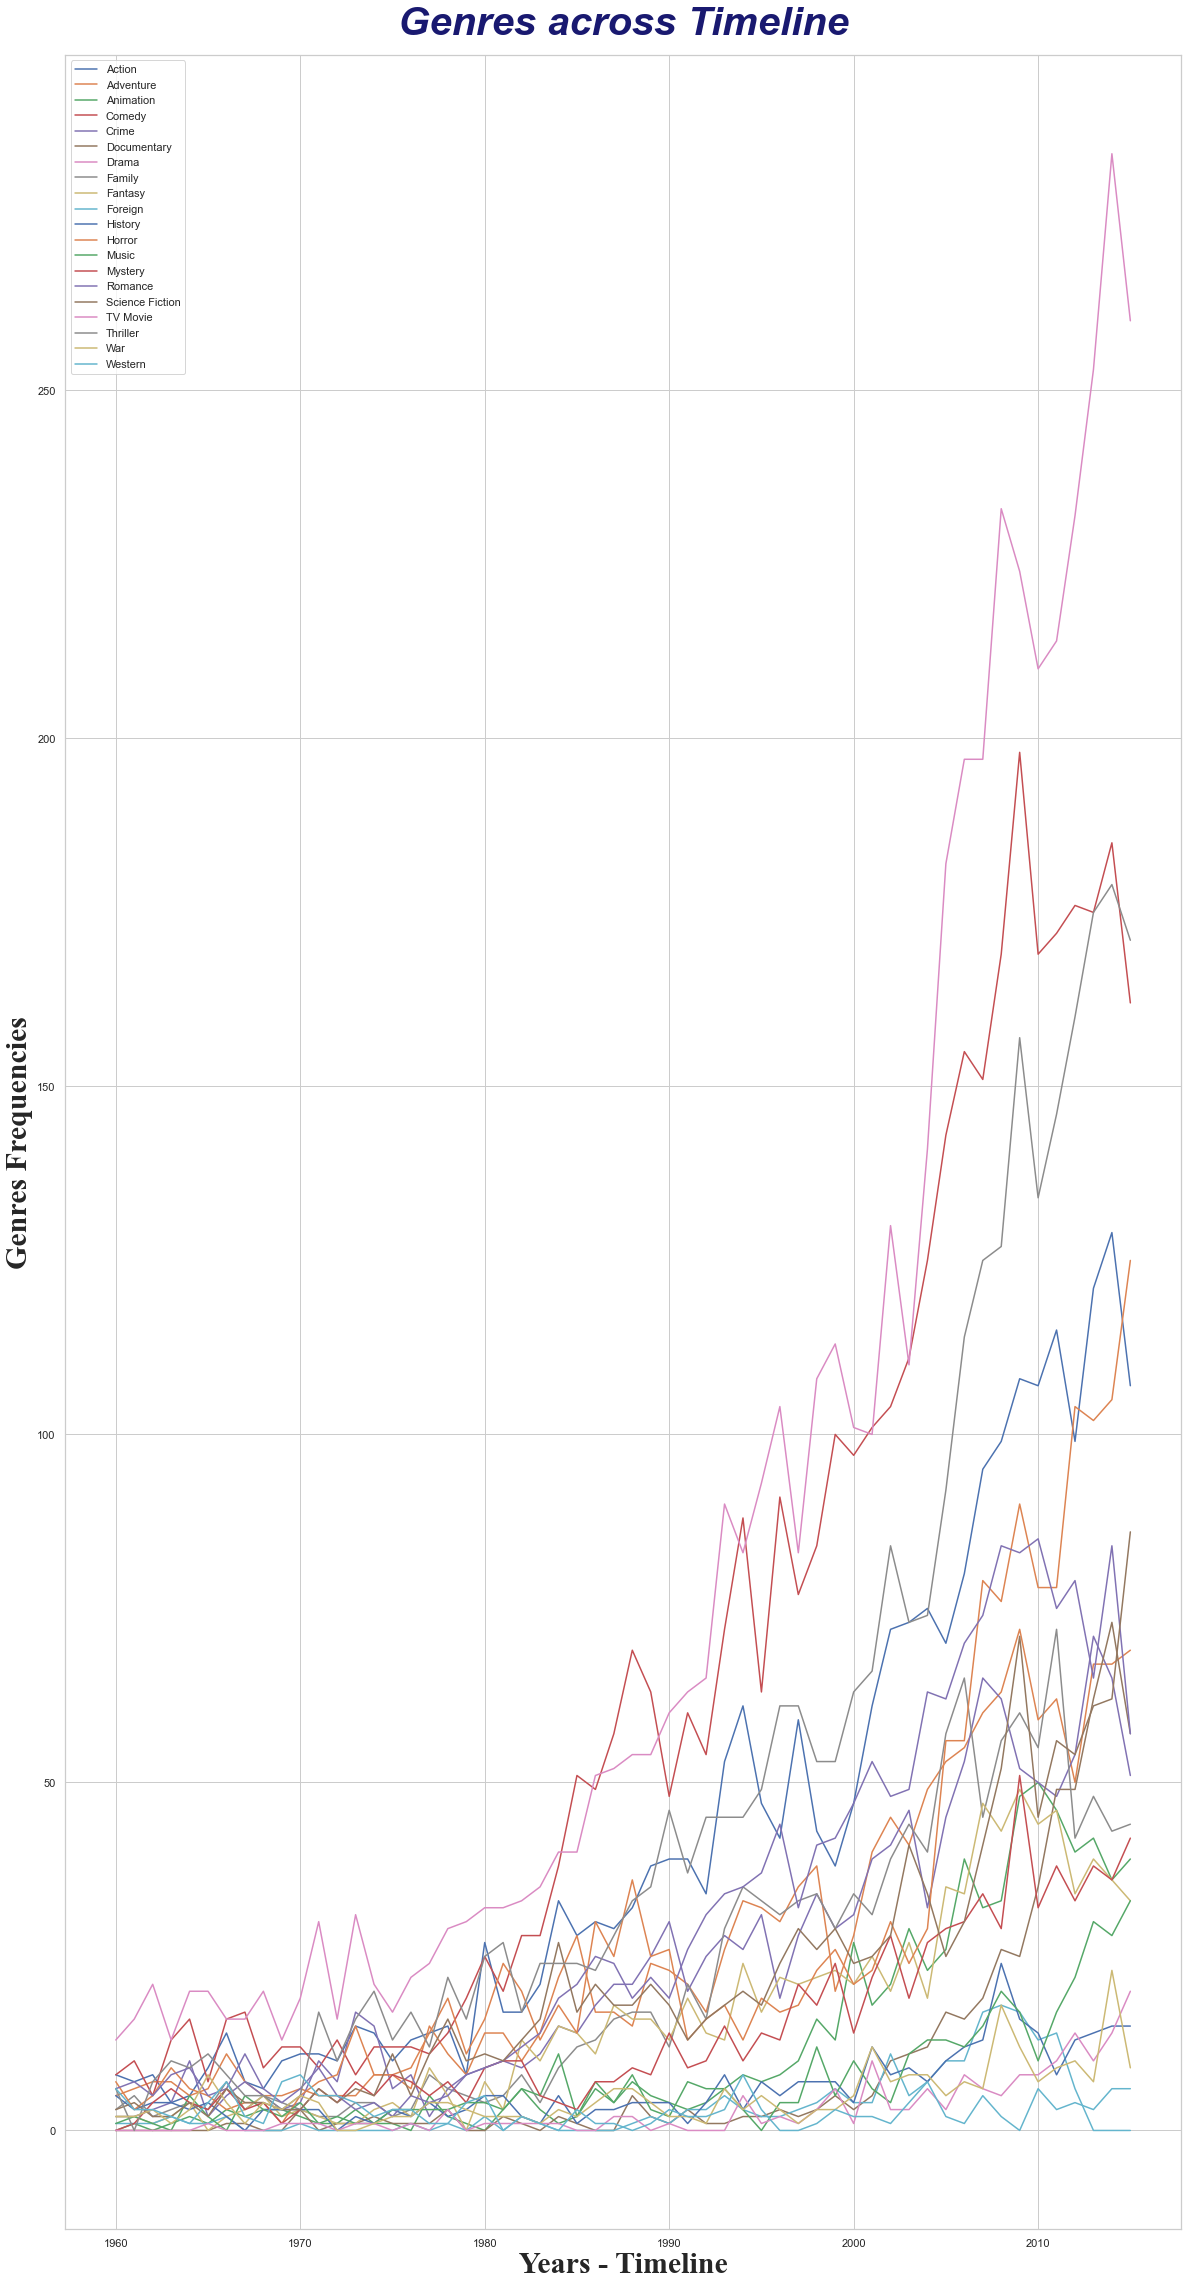

In [82]:
#ploting 
genre_year_n.plot(y=["Action", "Adventure", "Animation",'Comedy','Crime','Documentary','Drama','Family','Fantasy','Foreign','History','Horror','Music','Mystery','Romance','Science Fiction','TV Movie','Thriller','War','Western'],figsize=(20,40), xticks = np.arange(1960,2015,10))
#set the figure size and labels
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Genres across Timeline",fontsize = 40 ,pad=20 ,color='MidnightBlue',fontstyle= 'oblique',fontweight ='extra bold' ,fontfamily='sans-serif',fontvariant='small-caps')
plt.xlabel('Years - Timeline',fontsize = 30,fontweight ='bold',fontfamily= 'times new roman')
plt.ylabel('Genres Frequencies',fontsize = 30,fontweight ='bold',fontfamily= 'times new roman')
#set the style sheet
sns.set_style("whitegrid")

>### The changes in each genres frequency appear here with it's variation across years.
>>#### `There's a decline at the end of the Drama line but it's still got the hihest frequency.`
>> #### `The animaton & comedy thier frequency increases at the end of it's line.`

### Research Question 6 : What kinds of properties are associated with movies that have high revenues ?

### Research Question 7 : To what extent we can relate the vote of each movie to it's popularity ?

In [83]:
# creating a def to plot a correlation between the variable in our dataset
def correlation( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

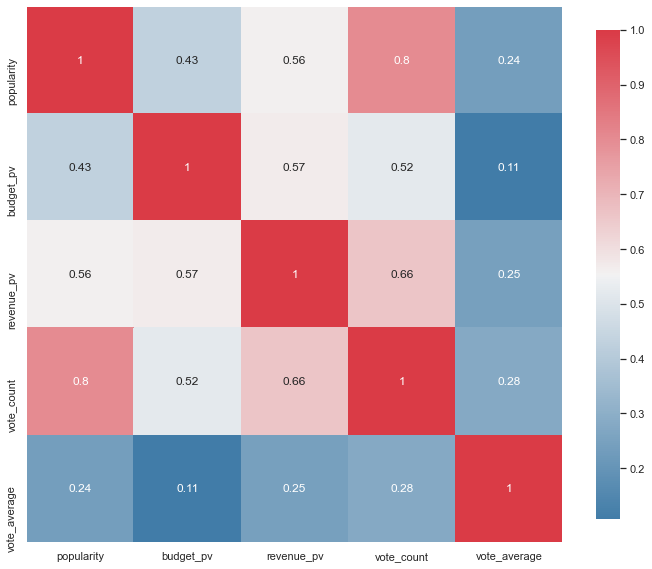

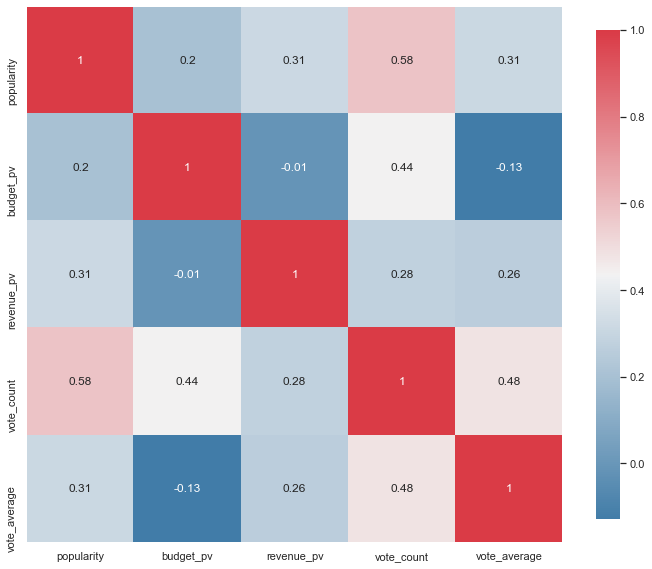

In [84]:
#plotting using the cleaned dataset to conduct more accurate results
correlation(tmdb_clean2[['popularity','budget_pv','revenue_pv','vote_count','vote_average']])
#plotting using the highest revenue [100 movies] to compare it with the previous correlation
highest_revenue100 = tmdb_clean2.nlargest(100, 'revenue_pv')[['popularity','budget_pv','revenue_pv','vote_count','vote_average']]
correlation(highest_revenue100[['popularity','budget_pv','revenue_pv','vote_count','vote_average']])

> ### **The above figure showing us the correlation between some vairables in our dataset and revenue, from it we can conduct to what extent each property effect one another.**
> ### Critria :
>>> ##### 0 < correlation - Positive ( Revenue increases with the the increase of the other factor)
>>> ##### 0 > correlation - Negative ( Revenue decrease with the the increase of the other factor)
>> #### `1- Revenue Vs. Popularity : With a correlation of 0.56, we can say that the revenue increases with the higher rate of popuarity, On the other hand the correlation with the highest revenues[100 movies] gives us a correlation of 0.31 which is less but still have a postive correlation so when it increases revenue increases as well.`
>> #### `2-  Revenue Vs. Budget : In the first figure the correlation was 0.57 (Positive) then turned to be 0.01 (negative) on the scale of the highest 100 movie revenue (decreasing revenue when increasing budget), we can conduct more useful insight by increasing the scale or decreasing it.`
>> #### `3-  Revenue Vs. Vote Count : Vote count has a high correlation of 0.66 ( So vote count effect the revenue positively as it's increasing ), in the other figure of the 100 movies associated with hte highest revenue show a correlation of 0.28 (also positive). `
>> #### `4-  Revenue Vs. Avarage Vote : With a close postive correlation on both figure of 0.25 and 0.26 respectively, so revenue increases with the increase in avarage vote.`
> #### `Popularity Vs. Vote Count : With a positive correlation of 0.8 , there's a strong correlation that's mean vote count reflect the popularity of movies.`

## References :
https://seaborn.pydata.org/index.html

https://pandas.pydata.org/docs/user_guide/index.html#user-guide

https://numpy.org/doc/stable/doc_conventions.html

https://matplotlib.org/stable/contents.html

geeksforgeeks

<a id='conclusions'></a>
## Conclusions
<br><br>
 - ### In December,January and July , Movies are mostly likely to be released.
 - ### Sunday & Saturday and thursday tend to be more likely to be a good choice to release movies.
 - ### Avatar & Star Wars and Titanic most profitable movies ( generated the highest net income & revenue ).
 - ### `The warrior's day`  Movies has the highest budget but exceeded it's revenue causing a loss.
 - ### `Number of movies` produced increasing rapidly from `year to year`.
 - ### `Drama` has the highest genre frequency then `Comedy`, `Thriller` and `Action`.
 - ### The `Animaton` & `Comedy` thier frequency increases in the last year periods across timeline with a slight decline in `Drama` genre.
 - ### General properties associated with the revenue discussed previously.
 - ### Strong correlation between `Popularity` and `Vote`.

### Limitations

> - The properties we have discussed are very insightful but the limitations may vary according to each Era, From analyzing data like this we come up with recommendations to improve the properties affecting the profitability & popularity of the movies, it doesn't 100% true but gives us insightful guidance.
> - During my data cleaning, I counter some problems like the existence of multiple genres, cast in the cell which is a little bit tricky if you want to conduct a more specific conclusion, I worked with the genre column as an example and split it and of course, stuff like this increases the time taken to calculate the results. 
> - Another thing, the problem with NaN values and 0 Values, it makes you think should you drop the rows to keep the structure of the data symmetric or to manipulate it to serve you by getting rid of them only when needed when you're conduction your analysis, Or it's more appropriate to fill them with the mean and rand. values. or taking more time extracting and searching for those missing values and at the end, it could not be that worth of the time and effort you spend. Those could lead us to a different result.
> - The way that I chose to handle my project is not perfect but I felt it would be more reasonable to follow from my perspective, I know that there's a lot to be done yet we all hope to do more but sometimes we are being restricted by our time constraints.